In [1]:
from google.colab import drive

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


In [3]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/PDS Assignment 3/Data_Clean/Corona_NLP_Cleaned Data.csv')

In [4]:
# Convert the text corpus into tokens
tokens = data['OriginalTweet'].apply(lambda x: x.lower().split())
print(tokens)

## Saving the results into results folder
result_save = open("/content/drive/MyDrive/PDS Assignment 3/results/tokens.txt","w")

# write file
result_save.write(str(tokens))

# close file
result_save.close()



0       [trending:, new, yorkers, encounter, empty, su...
1       [when, i, couldn't, find, hand, sanitizer, at,...
2       [find, out, how, you, can, protect, yourself, ...
3       [#panic, buying, hits, #newyork, city, as, anx...
4       [#toiletpaper, #dunnypaper, #coronavirus, #cor...
                              ...                        
3793    [meanwhile, in, a, supermarket, in, israel, --...
3794    [did, you, panic, buy, a, lot, of, non-perisha...
3795    [asst, prof, of, economics, @cconces, was, on,...
3796    [gov, need, to, do, somethings, instead, of, b...
3797    [i, and, @forestandpaper, members, are, commit...
Name: OriginalTweet, Length: 3798, dtype: object


In [5]:

# Define stop words to remove
stop_words = set(STOPWORDS)
stop_words.update(['https', 'co', 'coronavirus', 'covid', '19'])

# Remove stop words
tokens = tokens.apply(lambda x: [word for word in x if word not in stop_words])


In [8]:

# Count word frequencies
word_freq = pd.Series(tokens.sum()).value_counts()
print(word_freq)
## Saving the results into results folder
result_save = open("/content/drive/MyDrive/PDS Assignment 3/results/Word_frequencies.txt","w")

# write file
result_save.write(str(word_freq))

# close file
result_save.close()

#covid_19                  1465
#coronavirus               1243
food                       1007
grocery                     803
store                       769
                           ... 
@mountaindew                  1
#apocalypsparty               1
aster                         1
rs.198.                       1
https://t.co/xyvbnsfexa       1
Length: 20390, dtype: int64


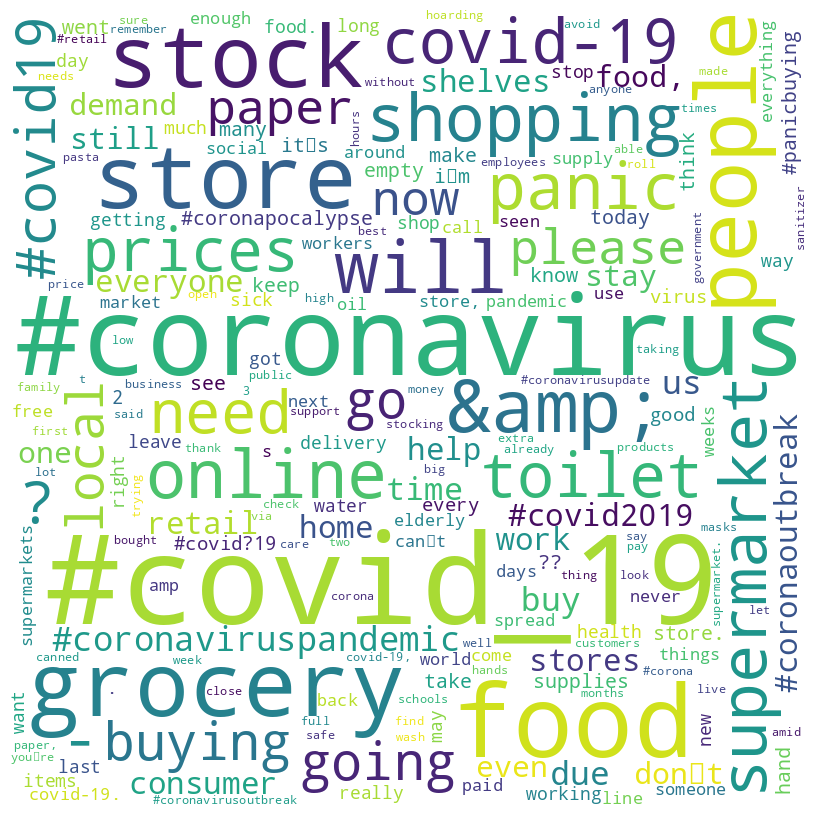

In [9]:
# Create word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(word_freq)
# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("/content/drive/MyDrive/PDS Assignment 3/results/word_cloud.jpeg")
plt.show()
